In [119]:
import pandas as pd
import numpy as np

In [120]:
traindf = pd.read_csv('C:\\Users\\cheek\\ML-7641-Team14\\dataset\output\\dataset_mar_23\\train.csv')
valdf = pd.read_csv('C:\\Users\\cheek\\ML-7641-Team14\\dataset\output\\dataset_mar_23\\val.csv')

In [121]:
print(traindf.head())
print(valdf.head())

      video_id                                              title publishedAt  \
0  Fk1I1SjiHY8  Power Book II: Ghost | Official Trailer | Seas...  2023-02-16   
1  fj3DzFrxs00  Julian Newman WENT OFF Against Tristan Jass an...  2023-02-02   
2  DoGeabe3baE  GET READY WITH US TO GO TO LES DO MAKEUP'S AND...  2023-02-28   
3  2PaeU_ABK94  Binging with Babish: Tater Tots from Breaking Bad  2023-01-31   
4  yOBteav0s1g                     My Friend sister Birthday Cake  2023-02-13   

                  channelId              channelTitle  categoryId   num_sub  \
0  UCXVxMuWK6l_pCyxEk07EIRw                     STARZ          24    754000   
1  UC5qUhMoqke0mnJtgVoEn0aw            Creator League          17    314000   
2  UC0psAD-M4X6O0yC_hFRK4hw              AlondraDessy          22   1290000   
3  UCJHA_jMfCvEnv-3kRjTCQXw  Babish Culinary Universe          22  10000000   
4  UCEmMl1-9FBQiRHGJWihAhFg             Cake Kalakaar          26    145000   

  trending_date                       

# Duplicate rows check

In [122]:
duplicate_rows = traindf[traindf.duplicated(['video_id'], keep=False)]
duplicate_rows

,video_id,title,publishedAt,channelId,channelTitle,categoryId,num_sub,trending_date,tags,views per day,likes per day,dislikes per day,comments per day,thumbnail_link,rating,description,trending


In [123]:
duplicate_rows = valdf[valdf.duplicated(['video_id'], keep=False)]
duplicate_rows

,video_id,title,publishedAt,channelId,channelTitle,categoryId,num_sub,trending_date,tags,views per day,likes per day,dislikes per day,comments per day,thumbnail_link,rating,description,trending


# Drop Columns
TDIL Channel title and title are different things

In [124]:
traindf.drop(['channelId','publishedAt', 'trending_date', 'views per day', 'likes per day', 'dislikes per day', 'comments per day', 'thumbnail_link', 'rating','video_id'], axis=1, inplace=True)
valdf.drop(['channelId','publishedAt', 'trending_date', 'views per day', 'likes per day', 'dislikes per day', 'comments per day', 'thumbnail_link', 'rating','video_id'], axis=1, inplace=True)

In [125]:
traindf['lang'] = traindf['title'] + ' ' + traindf['tags'] + ' ' + traindf['description'] + ' ' + traindf['channelTitle']
valdf['lang'] = valdf['title'] + ' ' + valdf['tags'] + ' ' + valdf['description'] + ' ' + valdf['channelTitle']
traindf.drop(['title', 'tags', 'description', 'channelTitle'], axis=1, inplace=True)
valdf.drop(['title', 'tags', 'description', 'channelTitle'], axis=1, inplace=True)

In [126]:
print(traindf.head())
print(valdf.head())

   categoryId   num_sub  trending  \
0          24    754000         1   
1          17    314000         1   
2          22   1290000         1   
3          22  10000000         1   
4          26    145000         0   

                                                lang  
0  Power Book II: Ghost | Official Trailer | Seas...  
1  Julian Newman WENT OFF Against Tristan Jass an...  
2  GET READY WITH US TO GO TO LES DO MAKEUP'S AND...  
3  Binging with Babish: Tater Tots from Breaking ...  
4  My Friend sister Birthday Cake doll cake kaise...  
   categoryId   num_sub  trending  \
0           2    511000         1   
1          26     24400         0   
2          10  26700000         1   
3          28  10700000         1   
4          28   2940000         1   

                                                lang  
0  What's Next For The Boat That Was Sunk At The ...  
1  Tapa Kimchi Rice | Home Foodie Cooking Show #M...  
2  TWICE READY TO BE Opening Trailer JYP Entertai...  
3  P

# Feature Engineering
Cleaning, scaling, normalizing

In [127]:
from scipy import stats
def normalizesubs(df):
    mean_subscribers = df['num_sub'].mean()
    std_subscribers = df['num_sub'].std()
    df['subscribers_normalized'] = (df['num_sub'] - mean_subscribers) / std_subscribers
    df['subscribers_boxcox'], l_ = stats.boxcox(df['subscribers_normalized'] + 1)
    #df.drop(['num_sub', 'subscribers_normalized'], axis=1, inplace=True)

In [128]:
normalizesubs(traindf)
normalizesubs(valdf)

In [129]:
print(traindf['lang'].head())

0    Power Book II: Ghost | Official Trailer | Seas...
1    Julian Newman WENT OFF Against Tristan Jass an...
2    GET READY WITH US TO GO TO LES DO MAKEUP'S AND...
3    Binging with Babish: Tater Tots from Breaking ...
4    My Friend sister Birthday Cake doll cake kaise...
Name: lang, dtype: object


### Preprocessing the lang

In [130]:
null_count = traindf['lang'].isnull().sum()

In [131]:
print(traindf[traindf['lang'].isnull()])

      categoryId  num_sub  trending lang  subscribers_normalized  \
27            28   161000         0  NaN               -0.356026   
57            15   577000         0  NaN               -0.329063   
68            27   143000         0  NaN               -0.357193   
90            28   327000         0  NaN               -0.345267   
132            2  2370000         0  NaN               -0.212846   
...          ...      ...       ...  ...                     ...   
4186          20  4720000         1  NaN               -0.060527   
4226          23   219000         0  NaN               -0.352267   
4253          24    51700         0  NaN               -0.363111   
4281          26    79100         0  NaN               -0.361335   
4314          20    19700         0  NaN               -0.365185   

      subscribers_boxcox  
27             -0.746897  
57             -0.642581  
68             -0.751732  
90             -0.703608  
132            -0.315997  
...                  

In [132]:
traindf['lang'] = traindf['lang'].fillna('')
valdf['lang'] = valdf['lang'].fillna('')

In [133]:
import string
import re
import nltk
nltk.data.path.append('C:/Users/cheek/ML-7641-Team14/shravan/nltk_data')
stopwords = nltk.corpus.stopwords.words('english')

In [134]:
max_length = traindf['lang'].apply(len).max()
print(max_length)

5510


In [135]:
max_length_index = traindf['lang'].str.len().idxmax()
row_with_max_length = traindf.loc[max_length_index]
row_with_max_length.apply(lambda x: print(x))

1
323000
0
Robot 3.0 Full Movie HD | Rajnikant  | Katrina Kaif | Shankar | 2023 | Full  Sci-Fi Movie in Hindi | 3.0 full movie|3.0 full movie in tamil|2.0 full movie|3.0 full movie in hindi|robot 3.0 movie|3.0 in 2.0 movie|3.0 rajinikanth|3.0 trailer tamil|salman in 3.0 movie|2.0 movie|3.0 trailer|robot 3.0 full movie|robot 3.0 trailer full movie|robot 3.0 movies|full movie 2.0|3.0 rajinikanth tamil|3.0 rajinikanth hindi|2.0 full movie in hindi|robot 3.0|full movie|robot 3.0 full hd movie|rajnikant new movie|new south movie 2023|robot #robot3  #AkshayKumar #ShankarRobot 3.0 Full Movie HD | Rajnikant  | Katrina Kaif | Shankar | 2023 | Full  Sci-Fi Movie in Hindi |After a decade of research, scientist Vaseegaran creates a sophisticated android humanoid robot with the help of his assistants, Siva and Ravi, in order to commission it into the Indian Army. He introduces the robot, named Chitti, at a robotics conference in Chennai. Chitti helps Sana, Vaseegaran's medical student girlfriend, c

categoryId                None
num_sub                   None
trending                  None
lang                      None
subscribers_normalized    None
subscribers_boxcox        None
Name: 2068, dtype: object

In [136]:
def pad_sequences(sentences, max_length, padding_token='<PAD>', null_token='<NULL>'):
    padded_sentences = []
    for sentence in sentences:
        # Replace null values with the null_token
        if sentence is None or len(sentence) == 0:
            padded_sentence = [null_token] * max_length
        else:
            # Truncate or pad the sentence to the max_length
            if len(sentence) > max_length:
                padded_sentence = sentence[:max_length]
            else:
                padded_sentence = sentence + [padding_token] * (max_length - len(sentence))

        padded_sentences.append(padded_sentence)

    return padded_sentences[0]

In [137]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    words = nltk.word_tokenize(text)
    filtered = []
    for word in words:
        if word not in stopwords:
            filtered.append(word)
    text = ' '.join(filtered)
    return text

In [138]:
try:
    traindf['lang'] = traindf['lang'].apply(lambda x: clean_text(x) if isinstance(x, (str, bytes)) else x)
except LookupError as e:
    print(f"Error occurred: {e}")

In [139]:
try:
    valdf['lang'] = valdf['lang'].apply(lambda x: clean_text(x) if isinstance(x, (str, bytes)) else x)
except LookupError as e:
    print(f"Error occurred: {e}")

In [140]:
max_length = traindf['lang'].apply(len).max()
print(max_length)
max_length_index = traindf['lang'].str.len().idxmax()
row_with_max_length = traindf.loc[max_length_index]
row_with_max_length.apply(lambda x: print(x))

4965
10
1680000
0
chawal official video sumit parta khushi ashu twinkle mote peg album new haryanvi song sumit partasumit parta songsmote pegmote peg sumit partachawalsystem padengechawal sumit partasumit parta chawalashu twinklenew haryanvi songnew haryanvi songs 2023new song 2023new haryanvi songs haryanavi 2023latest haryanvi songs 2023haryanvi songs 2023tera system padenge songchawal songnewharyanvisongs2023mote peg songtera system padengeyaar mere chadam terengebyah ke le jauchawal marengedefaulter goli marenge dinesh golan real music production presents new haryanvi song chawal ep mote peg sung sumit parta ashu twinkle starring sumit parta khushi vermamusic given jaizeey lyrics penned sumit partaclick create instagram reels songhttpswwwinstagramcomreelsaudio1151799692188638artist instagram profiles sumit parta httpswwwinstagramcomsumitparta09 song credits song title chawal system padenge album title mote pegstarring sumit parta khushi vermasinger sumit parta ashu twinklemusic jai

categoryId                None
num_sub                   None
trending                  None
lang                      None
subscribers_normalized    None
subscribers_boxcox        None
Name: 3285, dtype: object

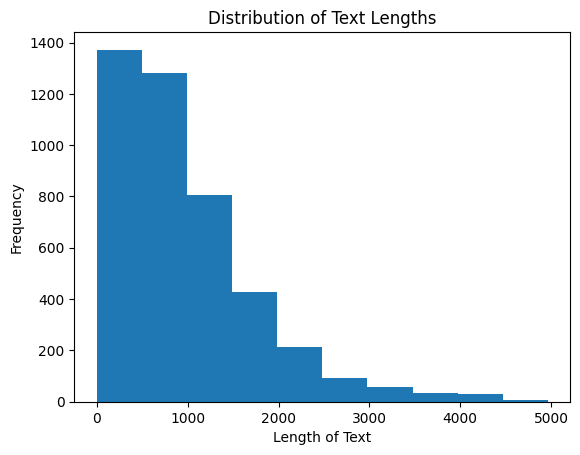

In [23]:
import matplotlib.pyplot as plt
lengths = traindf['lang'].apply(len)

plt.hist(lengths, bins=10)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

### 2000 lengths then?

In [24]:
print(lengths.describe())
print(lengths.quantile(0.90))


count    4324.000000
mean      961.948890
std       790.108977
min         0.000000
25%       408.000000
50%       777.000000
75%      1304.000000
max      4965.000000
Name: lang, dtype: float64
1994.7000000000003


In [25]:
# try:
#     traindf['lang'] = traindf['lang'].apply(lambda x: pad_sequences([x.split(' ')], 2000))
# except TypeError as e:
#     print(f"Error occurred: {e}")

In [26]:
# try:
#     valdf['lang'] = valdf['lang'].apply(lambda x: pad_sequences([x.split(' ')], 2000))
# except TypeError as e:
#     print(f"Error occurred: {e}")

Tokenized done

### Embedding begin

In [141]:
from gensim.models import Word2Vec

In [142]:
tokenized_data = traindf['lang'].tolist()

print(tokenized_data[0])
print(tokenized_data[2])
print(tokenized_data[6])


power book ii ghost official trailer season 3 power book iighostpower ghostpower never endslegacysneak peekpreviewstarztelevisiontvnew powertariq st patrickaftermathspinoffpower spinofffinalenewnew episodestashapowerpower starzpower ii starzbtspower book ii ghost clippower book ii ghost official clippower book 2power book ghostofficial clippower season 3ghost season 3ghost season 3 teaserghost season 3 trailer get ready levelin season 3 powerghost returns friday march 17th starz powerneverends powertv powerghostsubscribe starz youtube channel power httpbitly1kalhp0get special offer starz app httpsstarztv32s4agtlike power book ii ghost facebook httpsbitly2zfs6gwfollow power book ii ghost twitter httpstwittercomghoststarzfollow power book ii ghost instagram httpsbitly2cknb6pfacebook httpstarztvstarzfacebookyttwitter httpstarztvstarztwitterytinstagram httpstarztvstarzinstagramytyoutube httpsstarztvstarzyoutubetiktok httpsstarztvstarztiktokyt starz
get ready us go les makeups kb karlas eve

In [143]:
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

model.save("word2vec_model_real.model")

In [144]:
def get_text_embedding(tokens, model):
    embeddings = [model.wv[token] for token in tokens if token in model.wv]
    if len(embeddings) == 0:
        return np.zeros(model.vector_size)
    return np.mean(embeddings, axis=0)

traindf['text_embeddings'] = traindf['lang'].apply(lambda x: get_text_embedding(x, model))

In [145]:
valdf['text_embeddings'] = valdf['lang'].apply(lambda x: get_text_embedding(x, model))

In [146]:
def createCols(df):
    embedding_columns = [f"embedding_{i}" for i in range(len(df['text_embeddings'].iloc[0]))]
    embeddings_df = pd.DataFrame(df['text_embeddings'].tolist(), columns=embedding_columns)
    df = pd.concat([df, embeddings_df], axis=1)
    return df

In [147]:
traindf = createCols(traindf)
valdf = createCols(valdf)

In [32]:
def sum_embeddings(embeddings):
    return np.sum(embeddings, axis=0)

In [33]:
traindf['sum_text_embeddings'] = traindf['text_embeddings'].apply(lambda x: sum_embeddings(x))
valdf['sum_text_embeddings'] = valdf['text_embeddings'].apply(lambda x: sum_embeddings(x))

# Seperate prediction - y

In [148]:
y_train = traindf['trending']
y_val = valdf['trending']
traindf.drop(['trending'], axis=1, inplace=True)
valdf.drop(['trending'], axis=1, inplace=True)

# Training

In [149]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [150]:
traindf.columns

Index(['categoryId', 'num_sub', 'lang', 'subscribers_normalized',
       'subscribers_boxcox', 'text_embeddings', 'embedding_0', 'embedding_1',
       'embedding_2', 'embedding_3',
       ...
       'embedding_90', 'embedding_91', 'embedding_92', 'embedding_93',
       'embedding_94', 'embedding_95', 'embedding_96', 'embedding_97',
       'embedding_98', 'embedding_99'],
      dtype='object', length=106)

In [151]:
# X_train = traindf[['categoryId', 'subscribers_boxcox', 'text_embeddings']]
# X_test = valdf[['categoryId', 'subscribers_boxcox', 'text_embeddings']]
X_train = traindf.drop(['text_embeddings', 'lang', 'num_sub', 'subscribers_normalized'], axis=1)

In [152]:
X_test = valdf.drop(['text_embeddings', 'lang', 'num_sub', 'subscribers_normalized'], axis=1)

In [153]:
X_train

,categoryId,subscribers_boxcox,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,...,embedding_90,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99
0,24,-0.602166,-0.022351,-0.089555,-0.072581,-0.092869,0.008419,-0.088715,-0.176743,-0.119386,...,0.045912,0.005728,0.013451,0.214714,-0.019170,-0.099850,0.010372,0.050942,-0.056390,-0.057560
1,17,-0.706916,0.081280,-0.035971,0.072098,-0.130494,0.076977,-0.071479,-0.137041,-0.062437,...,0.176896,0.136622,0.047321,0.304242,0.167353,-0.059325,0.007330,-0.053111,0.013887,-0.078339
2,22,-0.492198,0.036840,-0.049285,0.020821,-0.149271,0.022608,-0.048514,-0.215014,-0.128969,...,0.125124,0.067622,0.027968,0.188852,0.077738,-0.063245,0.021561,-0.019154,-0.028270,-0.073913
3,22,0.190738,-0.060404,-0.083288,-0.067831,-0.185371,0.018378,-0.047808,-0.216127,-0.169926,...,0.048294,0.014508,0.025297,0.173865,-0.004977,-0.066747,0.046423,0.059077,-0.008613,-0.068452
4,26,-0.751194,0.074437,-0.050470,0.024109,-0.071785,0.139039,0.007881,-0.178166,-0.171855,...,0.169739,0.153758,0.169443,0.194380,0.267770,-0.011082,0.128293,-0.101520,-0.016677,0.007512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,10,-0.788926,0.051281,0.020564,0.038842,-0.050469,0.074117,-0.046697,-0.124385,-0.073970,...,0.065665,0.102974,0.045628,0.180763,0.125266,-0.038722,-0.058197,0.000593,0.023472,-0.066297
4320,20,-0.563251,0.028793,-0.010902,0.028330,-0.130150,0.073424,-0.076933,-0.194259,-0.134057,...,0.121273,0.066571,0.051551,0.202595,0.138078,-0.066435,0.066852,-0.018100,0.000953,-0.061918
4321,2,-0.787564,-0.026392,-0.034990,-0.026886,-0.089708,0.022605,-0.084173,-0.181196,-0.188606,...,0.057724,0.029188,0.054394,0.191421,0.056644,-0.052814,0.023430,0.025489,-0.002371,-0.065704
4322,22,-0.781876,0.144684,-0.016984,0.108826,-0.068912,0.134345,-0.041971,-0.147722,-0.071933,...,0.208871,0.132134,0.068627,0.240980,0.199137,-0.034939,0.002377,-0.052294,0.032721,-0.053062


In [154]:
X_test

,categoryId,subscribers_boxcox,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,...,embedding_90,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99
0,2,-0.643956,-0.031276,-0.046402,-0.059797,-0.089814,-0.011990,-0.056119,-0.170313,-0.160801,...,0.034067,0.037780,0.032101,0.172778,0.034729,-0.075799,-0.000440,0.033880,-0.038924,-0.069551
1,26,-0.750782,0.008218,-0.031078,0.007505,-0.057887,0.080798,-0.090891,-0.164155,-0.160079,...,0.090182,0.058800,0.073300,0.214331,0.152136,-0.058601,0.043775,0.010167,0.028671,-0.000737
2,10,0.352945,-0.055264,-0.077740,-0.054710,-0.087535,0.016876,-0.127931,-0.202035,-0.115569,...,0.047196,0.026902,0.034625,0.241335,0.054372,-0.114459,0.052121,0.068787,-0.071940,-0.062845
3,28,0.167626,-0.011962,-0.011841,-0.023856,-0.077227,0.028804,-0.052489,-0.169084,-0.179293,...,0.048966,0.051647,0.037925,0.195990,0.083860,-0.069105,0.027341,0.013099,0.025064,-0.044450
4,28,-0.273716,-0.019469,-0.069434,-0.003337,-0.098159,0.049782,-0.101795,-0.238260,-0.175925,...,0.082914,0.036428,0.033325,0.232012,0.093006,-0.087575,0.054916,0.036048,0.009025,-0.048203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,19,-0.685685,-0.014107,-0.063428,-0.030283,-0.096102,0.028502,-0.096506,-0.213383,-0.157913,...,0.077311,0.024588,0.026968,0.206161,0.053609,-0.096107,0.056923,0.039516,-0.030227,-0.043136
1078,15,-0.488196,0.073770,-0.018930,0.053239,-0.066085,0.115657,-0.056932,-0.182905,-0.178495,...,0.160714,0.094088,0.096971,0.236949,0.216169,-0.041781,0.119508,-0.089814,0.055553,-0.014294
1079,1,-0.735125,0.049896,-0.010546,0.024149,-0.077025,0.094498,-0.034304,-0.163150,-0.148945,...,0.130361,0.089694,0.063902,0.208732,0.157357,-0.055121,0.060351,-0.042546,0.023719,-0.026800
1080,1,0.195080,-0.020249,-0.032210,-0.008693,-0.091185,0.027321,-0.079416,-0.165007,-0.153779,...,0.065292,0.061965,0.043262,0.221136,0.090476,-0.054123,0.013094,0.002159,0.001852,-0.044479


In [155]:
# Train SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("SVM:")
print(confusion_matrix(y_val, svm_pred))
print(classification_report(y_val, svm_pred))
print("Accuracy:", accuracy_score(y_val, svm_pred))

SVM:
[[228 337]
 [ 83 434]]
              precision    recall  f1-score   support

           0       0.73      0.40      0.52       565
           1       0.56      0.84      0.67       517

    accuracy                           0.61      1082
   macro avg       0.65      0.62      0.60      1082
weighted avg       0.65      0.61      0.59      1082

Accuracy: 0.6118299445471349


In [156]:
# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print(rf_model.feature_importances_)

print("Random Forest:")
print(confusion_matrix(y_val, rf_pred))
print(classification_report(y_val, rf_pred))
print("Accuracy:", accuracy_score(y_val, rf_pred))

[0.06156693 0.04106838 0.00816562 0.00829437 0.0079761  0.00864168
 0.00836259 0.00773238 0.01115538 0.01024905 0.00708181 0.00772942
 0.00835702 0.00931371 0.00907228 0.00819251 0.00741565 0.00970017
 0.00886706 0.01351818 0.00858559 0.01064396 0.01245873 0.00811476
 0.00870332 0.01049644 0.00876221 0.0067457  0.008641   0.01123276
 0.00794763 0.00788966 0.00658962 0.00628446 0.00763621 0.00782376
 0.0109498  0.00596336 0.00792686 0.01179864 0.00990889 0.00759967
 0.00746844 0.00644771 0.00699362 0.01239353 0.00765032 0.00699476
 0.00652478 0.00878957 0.00744054 0.00846102 0.01179451 0.00776616
 0.01017026 0.00903661 0.00735535 0.01118175 0.010234   0.00738588
 0.00871972 0.00725611 0.01150835 0.01665177 0.00804886 0.01300365
 0.00928958 0.00673727 0.0074419  0.00817368 0.00667582 0.00829581
 0.00732271 0.00800853 0.00791099 0.00747201 0.00808953 0.00879833
 0.00901643 0.0105086  0.00934731 0.00846909 0.00757671 0.008656
 0.00931523 0.00830182 0.0094086  0.01279945 0.00980977 0.008965

In [157]:
# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Logistic Regression:")
print(confusion_matrix(y_val, lr_pred))
print(classification_report(y_val, lr_pred))
print("Accuracy:", accuracy_score(y_val, lr_pred))

Logistic Regression:
[[352 213]
 [175 342]]
              precision    recall  f1-score   support

           0       0.67      0.62      0.64       565
           1       0.62      0.66      0.64       517

    accuracy                           0.64      1082
   macro avg       0.64      0.64      0.64      1082
weighted avg       0.64      0.64      0.64      1082

Accuracy: 0.6414048059149723


c:\Users\cheek\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# NN

In [158]:
traindf

,categoryId,num_sub,lang,subscribers_normalized,subscribers_boxcox,text_embeddings,embedding_0,embedding_1,embedding_2,embedding_3,...,embedding_90,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99
0,24,754000,power book ii ghost official trailer season 3 ...,-0.317590,-0.602166,"[-0.022351101, -0.089554675, -0.072581194, -0....",-0.022351,-0.089555,-0.072581,-0.092869,...,0.045912,0.005728,0.013451,0.214714,-0.019170,-0.099850,0.010372,0.050942,-0.056390,-0.057560
1,17,314000,julian newman went tristan jass carson roney 2...,-0.346109,-0.706916,"[0.081280485, -0.03597077, 0.07209835, -0.1304...",0.081280,-0.035971,0.072098,-0.130494,...,0.176896,0.136622,0.047321,0.304242,0.167353,-0.059325,0.007330,-0.053111,0.013887,-0.078339
2,22,1290000,get ready us go les makeups kb karlas event al...,-0.282848,-0.492198,"[0.036840327, -0.049284644, 0.020821074, -0.14...",0.036840,-0.049285,0.020821,-0.149271,...,0.125124,0.067622,0.027968,0.188852,0.077738,-0.063245,0.021561,-0.019154,-0.028270,-0.073913
3,22,10000000,binging babish tater tots breaking bad none ep...,0.281706,0.190738,"[-0.06040393, -0.08328808, -0.06783077, -0.185...",-0.060404,-0.083288,-0.067831,-0.185371,...,0.048294,0.014508,0.025297,0.173865,-0.004977,-0.066747,0.046423,0.059077,-0.008613,-0.068452
4,26,145000,friend sister birthday cake doll cake kaise ba...,-0.357064,-0.751194,"[0.07443746, -0.050469805, 0.024109313, -0.071...",0.074437,-0.050470,0.024109,-0.071785,...,0.169739,0.153758,0.169443,0.194380,0.267770,-0.011082,0.128293,-0.101520,-0.016677,0.007512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,10,7960,aaron mercury apaga la luz aaronmercuryapagalu...,-0.365946,-0.788926,"[0.051280696, 0.020563934, 0.038841937, -0.050...",0.051281,0.020564,0.038842,-0.050469,...,0.065665,0.102974,0.045628,0.180763,0.125266,-0.038722,-0.058197,0.000593,0.023472,-0.066297
4320,20,934000,sonic amy funny dance sonic amy story shadow j...,-0.305923,-0.563251,"[0.028793288, -0.0109023675, 0.028330175, -0.1...",0.028793,-0.010902,0.028330,-0.130150,...,0.121273,0.066571,0.051551,0.202595,0.138078,-0.066435,0.066852,-0.018100,0.000953,-0.061918
4321,2,12800,check custom skoolie exterior tour travel tour...,-0.365632,-0.787564,"[-0.026392385, -0.03499007, -0.026885686, -0.0...",-0.026392,-0.034990,-0.026886,-0.089708,...,0.057724,0.029188,0.054394,0.191421,0.056644,-0.052814,0.023430,0.025489,-0.002371,-0.065704
4322,22,33100,viral aiya susanti shorts drakodrama lucufunny...,-0.364317,-0.781876,"[0.14468384, -0.01698414, 0.108825974, -0.0689...",0.144684,-0.016984,0.108826,-0.068912,...,0.208871,0.132134,0.068627,0.240980,0.199137,-0.034939,0.002377,-0.052294,0.032721,-0.053062


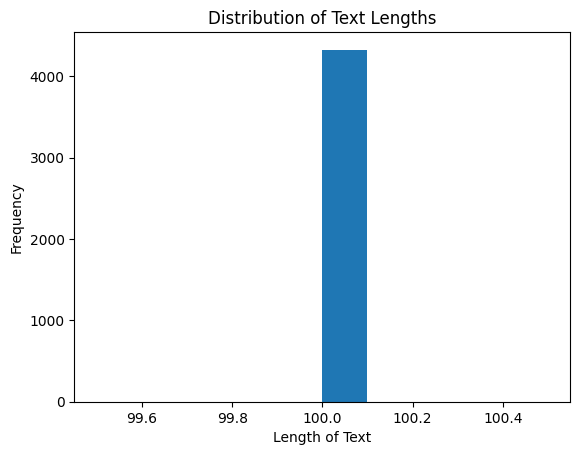

In [159]:
lengths = traindf['text_embeddings'].apply(len)

plt.hist(lengths, bins=10)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

In [160]:
import torch
from torch.utils.data import Dataset, DataLoader

In [161]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X.iloc[idx].values, dtype=torch.float), torch.tensor(self.y.iloc[idx], dtype=torch.long)

train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_test, y_val)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [162]:
import torch.nn as nn
import torch.nn.functional as F

In [163]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        nn.Sigmoid()
        return x

input_size = X_train.shape[1]
num_classes = 2 
model = SimpleNN(input_size, num_classes)


In [164]:
import torch.optim as optim


In [165]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)


num_epochs = 35

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_dataloader)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}")

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = running_loss / len(val_dataloader)
    val_accuracy = correct / total
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")



Epoch 1, Train Loss: 0.686361530686126
Epoch 1, Validation Loss: 0.6827533262617448, Validation Accuracy: 0.522181146025878
Epoch 2, Train Loss: 0.6810740385861958
Epoch 2, Validation Loss: 0.6815981076044195, Validation Accuracy: 0.522181146025878
Epoch 3, Train Loss: 0.6793839230256922
Epoch 3, Validation Loss: 0.6809075316962074, Validation Accuracy: 0.5231053604436229
Epoch 4, Train Loss: 0.6780876438407337
Epoch 4, Validation Loss: 0.68125359100454, Validation Accuracy: 0.522181146025878
Epoch 5, Train Loss: 0.6766278664855396
Epoch 5, Validation Loss: 0.6801914467531092, Validation Accuracy: 0.5249537892791127
Epoch 6, Train Loss: 0.6768606874872657
Epoch 6, Validation Loss: 0.6791082550497616, Validation Accuracy: 0.522181146025878
Epoch 7, Train Loss: 0.6755479894140187
Epoch 7, Validation Loss: 0.6781907239381004, Validation Accuracy: 0.522181146025878
Epoch 8, Train Loss: 0.67480479049332
Epoch 8, Validation Loss: 0.6779360403032864, Validation Accuracy: 0.5268022181146026
Ep